In [1]:
import pandas as pd
import pymc3 as pm
import numpy as np
%matplotlib inline


Which factor contributes most to the number of damages that a ship incurs? Let's figure out using Poisson regression.

Poisson regression - they key here is that the likelihood function is a Poisson likelihood - to model counts. We place Normal(0, 1) priors on the beta coefficients.

In [2]:
df = pd.read_csv('datasets/ship-damage.txt')
# Log10 transform months
df['months'] = df['months'].apply(lambda x: np.log10(x))
df.head()

,type,yr_construction,period_op,months,n_damages
0,1,1,1,2.103804,0
1,1,1,2,1.799341,0
2,1,2,1,3.039414,3
3,1,2,2,3.039414,4
4,1,3,1,3.179552,6


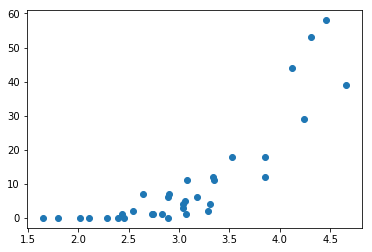

In [3]:
plt.scatter(x=df['months'], y=df['n_damages'])

In [8]:
with pm.Model() as model:
    betas = pm.Normal('betas', mu=0, sd=100**2, shape=(3, 1))    
    n_damages = betas[0] * df['yr_construction'] + betas[1] * df['period_op'] + betas[2] * df['months']
        
    n_damages_like = pm.Poisson('likelihood', mu=np.exp(n_damages), observed=df['n_damages'])
    trace = pm.sample(draws=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -195.95: 100%|██████████| 200000/200000 [00:08<00:00, 23877.30it/s]
Finished [100%]: Average ELBO = -195.95
100%|██████████| 2000/2000 [00:04<00:00, 447.83it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f51c44bd860>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f51cc05bf98>]], dtype=object)

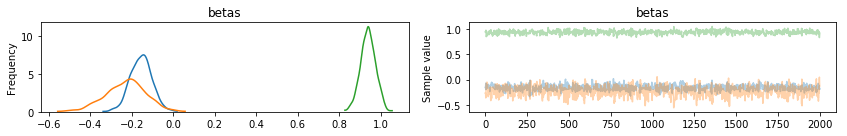

In [10]:
pm.traceplot(trace)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f51cebf0518>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f51c6675fd0>], dtype=object)

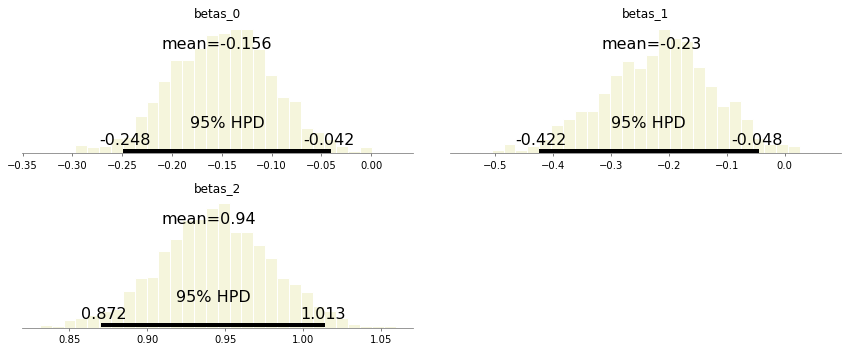

In [11]:
pm.plot_posterior(trace, color='beige', )

In [12]:
pm.summary(trace)


betas:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  ..............................[0, :]...............................
  -0.156           0.052            0.002            [-0.248, -0.042]
  ..............................[1, :]...............................
  -0.230           0.097            0.004            [-0.422, -0.048]
  ..............................[2, :]...............................
  0.940            0.036            0.001            [0.872, 1.013]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  .............................[0, :].............................
  -0.260         -0.191         -0.154         -0.121         -0.053
  .............................[1, :].............................
  -0.426         -0.293         -0.223         -0.165         -0.049
  ....